In [33]:
import pandas as pd
import numpy as np
import pickle as p
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,Perceptron,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import StackingClassifier

In [3]:
le = LabelEncoder()

In [4]:
data = pd.read_csv(r'merged_data.csv')

In [5]:
data.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5204 non-null   int64  
 1   Age               5204 non-null   int64  
 2   Gender            5204 non-null   object 
 3   MaritalStatus     5204 non-null   object 
 4   IncomeLevel       5204 non-null   object 
 5   TransactionID     5204 non-null   int64  
 6   TransactionDate   5204 non-null   object 
 7   AmountSpent       5204 non-null   float64
 8   ProductCategory   5204 non-null   object 
 9   InteractionID     5204 non-null   int64  
 10  InteractionDate   5204 non-null   object 
 11  InteractionType   5204 non-null   object 
 12  ResolutionStatus  5204 non-null   object 
 13  LastLoginDate     5204 non-null   object 
 14  LoginFrequency    5204 non-null   int64  
 15  ServiceUsage      5204 non-null   object 
 16  ChurnStatus       5204 non-null   int64  


In [7]:
data = data.drop(columns=['CustomerID','TransactionID','TransactionDate','InteractionID','InteractionDate','LastLoginDate'], axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               5204 non-null   int64  
 1   Gender            5204 non-null   object 
 2   MaritalStatus     5204 non-null   object 
 3   IncomeLevel       5204 non-null   object 
 4   AmountSpent       5204 non-null   float64
 5   ProductCategory   5204 non-null   object 
 6   InteractionType   5204 non-null   object 
 7   ResolutionStatus  5204 non-null   object 
 8   LoginFrequency    5204 non-null   int64  
 9   ServiceUsage      5204 non-null   object 
 10  ChurnStatus       5204 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 447.3+ KB


In [9]:
data.isnull().sum()

Age                 0
Gender              0
MaritalStatus       0
IncomeLevel         0
AmountSpent         0
ProductCategory     0
InteractionType     0
ResolutionStatus    0
LoginFrequency      0
ServiceUsage        0
ChurnStatus         0
dtype: int64

In [10]:
data['Gender'] = le.fit_transform(data['Gender'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['IncomeLevel'] = le.fit_transform(data['IncomeLevel'])
data['ProductCategory'] = le.fit_transform(data['ProductCategory'])
data['InteractionType'] = le.fit_transform(data['InteractionType'])
data['ResolutionStatus'] = le.fit_transform(data['ResolutionStatus'])
data['ServiceUsage'] = le.fit_transform(data['ServiceUsage'])

**Model Training**

In [11]:
X = data.drop(columns=['ChurnStatus'])
y = data['ChurnStatus']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

In [13]:
log_reg = LogisticRegression(max_iter=1000)  # Increased from 100 to 1000
rigde = RidgeClassifier(max_iter=1000)

models = {
    'Logistic Regression': log_reg,
    'Passive Aggressive': PassiveAggressiveClassifier(),
    'Precepton': Perceptron(),
    'Ridge': rigde,
    'Linear SVC': LinearSVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Histogram Gradient': HistGradientBoostingClassifier(),
    'Extra Tree': ExtraTreesClassifier(),
}

for name, model in models.items():
    y_pred = cross_val_predict(model, X_train, y_train, cv=3)
    
    score_1 = precision_score(y_train, y_pred,  average='binary')
    score_2 = recall_score(y_train, y_pred, average='binary')
    score_3 = f1_score(y_train, y_pred, average='binary')

    scores = [round(score_1,4), round(score_2,4), round(score_3,4)]
    print(f"{name}: {scores}")


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression: [0.0, 0.0, 0.0]
Passive Aggressive: [0.216, 0.176, 0.194]
Precepton: [0.0, 0.0, 0.0]


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ridge: [0.0, 0.0, 0.0]
Linear SVC: [0.0, 0.0, 0.0]
Random Forest: [0.9932, 0.8555, 0.9192]
Gradient Boosting: [0.907, 0.3182, 0.4711]
Histogram Gradient: [0.9547, 0.8846, 0.9183]
Extra Tree: [0.9834, 0.8998, 0.9397]


In [14]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Histogram Gradient': HistGradientBoostingClassifier(),
    'Extra Tree': ExtraTreesClassifier()
}

for name,model in models.items():
    y_pred = cross_val_predict(model, X_test, y_test, cv=3)

    score_1 = precision_score(y_test, y_pred,  average='binary')
    score_2 = recall_score(y_test, y_pred, average='binary')
    score_3 = f1_score(y_test, y_pred, average='binary')

    scores = [round(score_1,4), round(score_2,4), round(score_3,4)]
    print(f"{name}: {scores}")

Random Forest: [0.913, 0.2944, 0.4452]
Histogram Gradient: [0.6977, 0.4206, 0.5248]
Extra Tree: [0.8911, 0.4206, 0.5714]


In [15]:
model_1 = RandomForestClassifier()
model_2 = ExtraTreesClassifier()
model_3 = HistGradientBoostingClassifier()

In [16]:
model_1.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
model_2.fit(X_train, y_train)

ExtraTreesClassifier()

In [18]:
model_3.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [19]:
estimators = [
    ('model-1',model_1),
    ('model-2',model_2),
    ('model-3', model_3)
]

In [20]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator = ExtraTreesClassifier(),
    cv=3
)

In [21]:
clf.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('model-1', RandomForestClassifier()),
                               ('model-2', ExtraTreesClassifier()),
                               ('model-3', HistGradientBoostingClassifier())],
                   final_estimator=ExtraTreesClassifier())

In [22]:
clf.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [25]:
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)

print(f'Train Accuracy: {round(acc_train,3)}')
print(f'Test Accuracy: {round(acc_test,3)}')

Train Accuracy: 1.0
Test Accuracy: 0.992


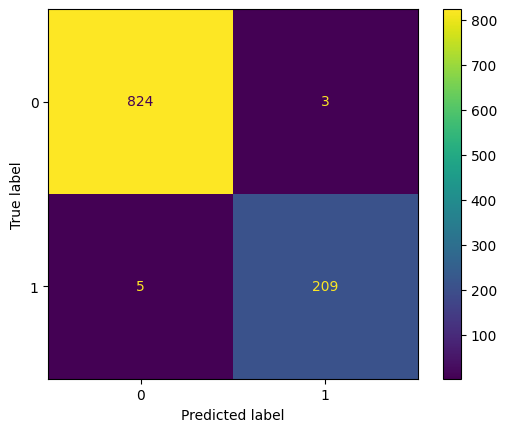

In [28]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test
);

In [30]:
print(classification_report(
    y_test,
    clf.predict(X_test)
))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       827
           1       0.99      0.98      0.98       214

    accuracy                           0.99      1041
   macro avg       0.99      0.99      0.99      1041
weighted avg       0.99      0.99      0.99      1041



In [32]:
with open('StackedClassifier.pkl', 'wb') as f:
    p.dump(clf,f)

In [35]:
file_path = os.path.abspath('StackedClassifier.pkl')
print(file_path)

C:\Users\DELL\StackedClassifier.pkl
